In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

melb_data = pd.read_hdf('data/melb_data.h5')

from util.melbourne import Melbourne

melbourne = Melbourne(melb_data, frac=1)

In [11]:
melbourne.raw_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Month
5734,Southbank,125/173 City Rd,1,u,425000.0,VB,Greg,2016-04-16,1.2,3006.0,...,1.0,0.0,57.0,2004.0,Melbourne,-37.82450,144.96220,Southern Metropolitan,8400.0,4
2258,Elwood,2/131 Brighton Rd,2,u,507000.0,S,Morleys,2016-12-03,7.7,3184.0,...,1.0,0.0,79.0,1970.0,Port Phillip,-37.87520,144.99110,Southern Metropolitan,8989.0,12
9109,Coburg North,4 Blanche Ct,3,h,690000.0,S,Brad,2017-06-03,6.7,3058.0,...,2.0,479.0,115.0,1980.0,Moreland,-37.73251,144.98178,Northern Metropolitan,3445.0,6
4660,Pascoe Vale,7 Coane St,4,h,1350000.0,PI,Nelson,2016-11-19,9.9,3044.0,...,2.0,646.0,287.0,1995.0,Moreland,-37.72560,144.93830,Northern Metropolitan,7485.0,11
10085,Wantirna South,14 Riverpark Dr,6,h,1180000.0,S,Ray,2017-06-24,14.7,3152.0,...,2.0,453.0,305.0,2001.0,Knox,-37.87309,145.23078,Eastern Metropolitan,7082.0,6


In [12]:
for nominal_feature in melbourne.nominal_features:
    the_nominal_features = melbourne.raw_df.loc[:, nominal_feature].sort_values().unique()
    print(f'''
        nominal feature: {nominal_feature}      cardinality: {len(the_nominal_features)}

        {the_nominal_features}
    ''')


        nominal feature: Suburb      cardinality: 314

        ['Abbotsford' 'Aberfeldie' 'Airport West' 'Albanvale' 'Albert Park'
 'Albion' 'Alphington' 'Altona' 'Altona Meadows' 'Altona North' 'Ardeer'
 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood' 'Aspendale'
 'Aspendale Gardens' 'Attwood' 'Avondale Heights' 'Bacchus Marsh'
 'Balaclava' 'Balwyn' 'Balwyn North' 'Bayswater' 'Bayswater North'
 'Beaconsfield' 'Beaconsfield Upper' 'Beaumaris' 'Bellfield' 'Bentleigh'
 'Bentleigh East' 'Berwick' 'Black Rock' 'Blackburn' 'Blackburn North'
 'Blackburn South' 'Bonbeach' 'Boronia' 'Box Hill' 'Braybrook'
 'Briar Hill' 'Brighton' 'Brighton East' 'Broadmeadows' 'Brookfield'
 'Brooklyn' 'Brunswick' 'Brunswick East' 'Brunswick West' 'Bulleen'
 'Bullengarook' 'Bundoora' 'Burnley' 'Burnside' 'Burnside Heights'
 'Burwood' 'Burwood East' 'Cairnlea' 'Camberwell' 'Campbellfield'
 'Canterbury' 'Carlton' 'Carlton North' 'Carnegie' 'Caroline Springs'
 'Carrum' 'Carrum Downs' 'Caulfield' 'Caulfield East' 'C

Clustering by the following nominal features:

* `Type`
* `Method`
* `Regionname`

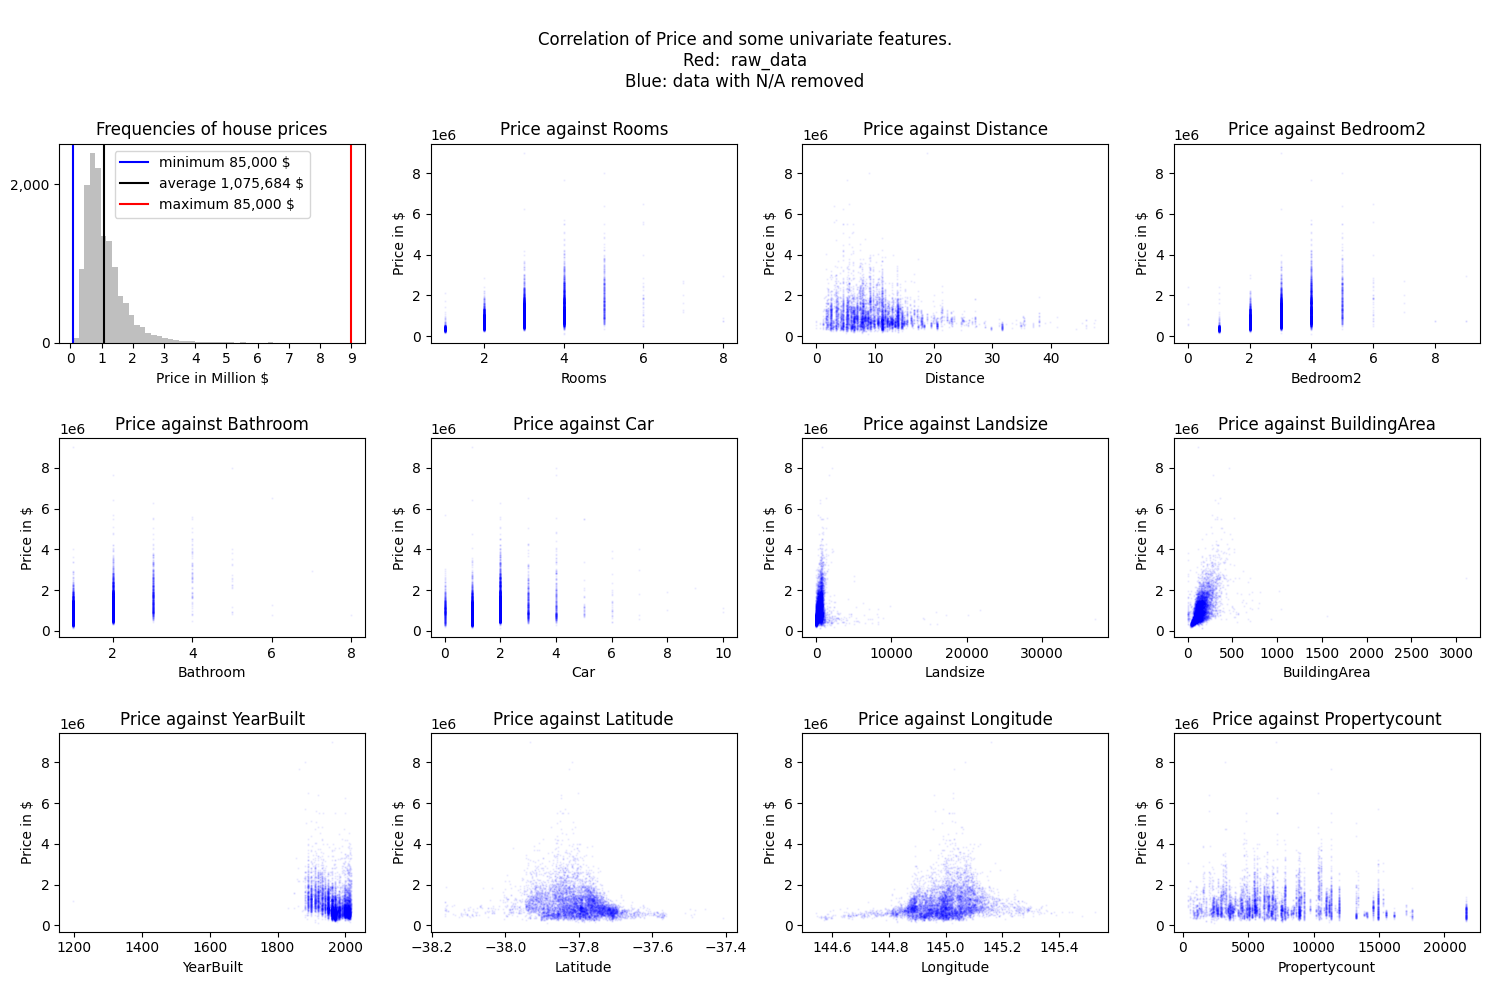

In [14]:
from matplotlib.ticker import MultipleLocator, FuncFormatter

fig, axes = plt.subplots(3, 4, figsize=(15, 10))

fig.suptitle('''
Correlation of Price and some univariate features.
Red:  raw_data
Blue: data with N/A removed
''')

ax = axes[0,0]
ax.set_title('Frequencies of house prices')
ax.set_xlabel('Price in Million \\$')
ax.xaxis.set_major_locator(MultipleLocator(base=1e6))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:,.0f}'))
ax.yaxis.set_major_locator(MultipleLocator(base=2e3))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax.hist(melbourne.prices, bins=50, range=(melbourne.min_price, melbourne.max_price), color='grey', alpha=.5)
ax.axvline(melbourne.min_price, color='blue', label=f'minimum {melbourne.min_price:,.0f} \\$')
ax.axvline(melbourne.mean_price, color='black', label=f'average {melbourne.mean_price:,.0f} \\$')
ax.axvline(melbourne.max_price, color='red', label=f'maximum {melbourne.min_price:,.0f} \\$')

ax.legend()

# Plot Price against predictor for each of the 11 numerical predictors

for ax, predictor in zip(axes.flatten()[1:], melbourne.numerical_features):
    ax.set(
        title=f'Price against {predictor}',
        xlabel=f'{predictor}',
        ylabel=f'Price in \\$'
    )
    # ax.scatter(melbourne.raw_df[predictor], melbourne.raw_df['Price'], s=.5, alpha=.05, color='red')
    ax.scatter(melbourne.df[predictor], melbourne.df['Price'], s=.5, alpha=.05, color='blue')

fig.tight_layout()
plt.show()